In [14]:
## reference website: https://librosa.github.io/librosa/generated/librosa.beat.beat_track.html
%matplotlib inline
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from IPython.display import Audio

# librosa sample code within 2 second wave

In [34]:
filename = '/home/alvin/cei/notebook_home/ai_lab_sound/beat_tracting/corpus/mirex_beat_tracking_2016/train/train11.wav'
#filename = librosa.util.example_audio_file()
y, sr = librosa.load(filename,offset=20, duration=2.0)
onset_frames      = librosa.onset.onset_detect(y=y, sr=sr)
onset_frames_time = librosa.frames_to_time(onset_frames, sr=sr)
out = pd.DataFrame(np.vstack((onset_frames,onset_frames_time)))
out[0][0] = round(out[0][0],1)
display(out)

,0,1,2,3,4,5,6,7,8,9,10
0,3.00000,11.00000,22.000000,29.000000,39.000000,43.000000,48.000000,60.000000,66.000000,75.000000,84.000000
1,0.06966,0.25542,0.510839,0.673379,0.905578,0.998458,1.114558,1.393197,1.532517,1.741497,1.950476


In [5]:
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

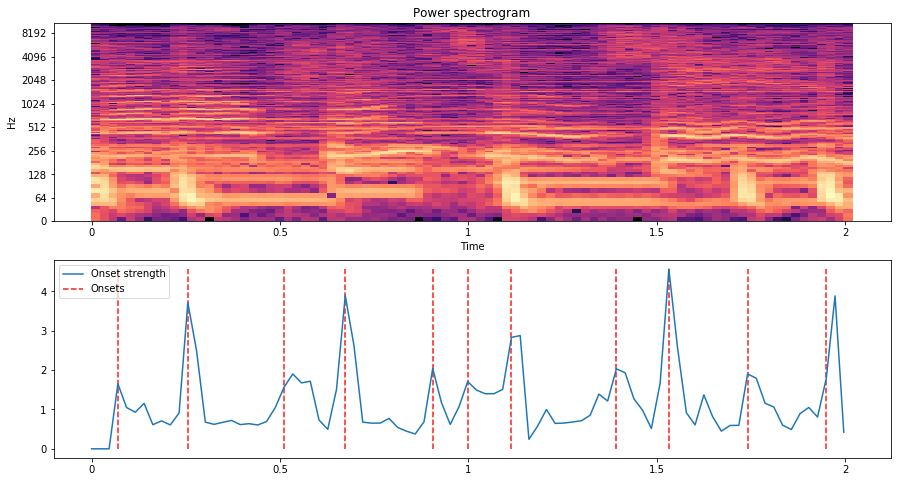

In [47]:
D = librosa.stft(y)
plt.figure(figsize=(15,8))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

In [35]:
Audio(data=y,rate=sr)

In [86]:
o_env = librosa.onset.onset_strength(y, sr=sr)
print('all onset num is ' + str(o_env.shape))

all onset num is (87,)


# wave --> frame
## <font color='blue'>frame size = 512<br> hop (stride) = 0</font>

In [88]:
fs = 512
frameset = librosa.util.frame(y, frame_length=fs)

In [98]:
# display frame shape info and show data by pandas
print('in totaly '+ str(int(len(y)/sr))+'s file ('+str(len(y))+' sample)')
print('each frame have ' + str(fs) + ' sameple')
print('we should have '+str(len(y))+'/'+str(fs)+' = '+ str(len(y)/fs) + ' frames')
print('output frame matrix ' + str(frameset.shape))
display(pd.DataFrame(frameset))

in totaly 2s file (44100 sample)
each frame have 512 sameple
we should have 44100/512 = 86.1328125 frames
output frame matrix (512, 86)


,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.034426,0.173321,0.229343,0.012385,0.161899,0.022065,-0.110884,0.003492,-0.012176,-0.001596,...,0.039174,0.246203,-0.144829,-0.005447,-0.057858,0.108294,0.033339,0.137168,-0.099765,0.250392
1,0.000202,0.163975,0.232567,0.072245,0.162381,0.053303,-0.016376,0.042087,-0.029542,0.039656,...,-0.023977,0.249329,-0.181302,-0.039523,-0.034904,0.118400,0.036878,0.132723,-0.135615,0.270355
2,0.037463,0.125044,0.163151,0.045991,0.172539,0.016185,-0.023874,0.061595,-0.053461,0.040344,...,-0.026635,0.202283,-0.233168,-0.052915,-0.066211,0.105397,0.011934,0.131698,-0.156057,0.219769
3,0.072246,0.131451,0.095495,-0.080813,0.202934,0.050141,-0.073143,0.029890,-0.072548,0.020386,...,0.025463,0.162391,-0.271286,-0.002426,-0.138482,0.128827,-0.024053,0.247075,-0.106593,0.277144
4,0.092052,0.154539,0.069886,-0.088097,0.160972,0.013922,-0.118200,0.028651,-0.083412,-0.004079,...,0.150530,0.265160,-0.250577,0.064576,-0.123250,0.149689,-0.014097,0.285174,-0.070145,0.292156
5,0.098630,0.138362,0.015019,-0.116832,0.178671,-0.044872,-0.125641,0.037546,-0.071853,0.016713,...,0.164445,0.301905,-0.238395,0.065045,-0.106725,0.165110,0.001995,0.250410,-0.111751,0.290609
6,0.119634,0.121666,-0.020825,-0.177902,0.108883,-0.077651,-0.098440,0.018387,-0.100101,0.030538,...,0.129876,0.215109,-0.250948,0.093453,-0.166116,0.128992,-0.005590,0.269472,-0.152750,0.295012
7,0.120110,0.084137,-0.026956,-0.202739,0.101479,-0.085851,-0.091994,-0.020019,-0.112758,0.027819,...,0.128691,0.166206,-0.232808,0.089931,-0.201816,0.079248,-0.009671,0.202737,-0.140287,0.288821
8,0.097498,0.122330,0.012418,-0.195918,0.166457,-0.032138,-0.065827,-0.006293,-0.107550,0.027285,...,0.134391,0.175261,-0.208311,-0.006794,-0.171972,0.069629,-0.000902,0.310635,-0.145479,0.324088
9,0.131304,0.099630,0.007554,-0.221410,0.085749,-0.051379,-0.068927,0.024284,-0.108871,0.052201,...,0.178907,0.170514,-0.190831,0.026820,-0.128312,0.019878,0.017294,0.243835,-0.134879,0.301132


# wave -> mel (w/ frame)

In [114]:
#feature = melspectrogram
mel = librosa.feature.melspectrogram(y=y, sr=sr)
S = np.abs(mel)
# Convert to dBs
S = librosa.core.logamplitude(S)
print('in totaly '+ str(int(len(y)/sr))+'s file ('+str(len(y))+' sample)')

in totaly 2s file (44100 sample)


In [105]:
S.shape

(128, 87)

In [107]:
mel.shape

(128, 87)

In [108]:
display(pd.DataFrame(mel))

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,9.569447,10.528135,12.232152,4.897770,2.162189,1.529957,0.369661,0.054941,0.128574,0.912993,...,5.977537,3.728074,4.214914,1.861407,1.994051,2.618104,2.422664,10.541557,40.834665,24.014684
1,113.487486,199.978336,86.162358,12.717065,4.772772,6.625230,7.529680,7.486972,7.909506,23.117445,...,6.684964,10.611636,14.841291,11.810939,13.069328,15.681095,134.662882,483.777061,370.490976,57.844912
2,276.095988,345.387660,68.162768,15.452048,25.054810,28.629567,29.859220,34.494617,33.084189,47.764844,...,7.811905,3.790455,3.519907,4.070491,5.515942,8.209555,311.735368,708.585027,181.428048,31.373179
3,251.914010,185.517820,17.537837,1.238375,3.063300,1.778198,1.005681,2.679364,3.245619,60.302612,...,14.306800,9.057448,8.416150,11.326529,15.671000,16.878080,231.502724,381.568544,39.031428,5.233480
4,66.374253,46.570176,31.124100,30.145869,36.057134,32.489510,24.516254,29.334840,29.865349,48.516183,...,4.765590,1.665923,1.442811,1.745529,2.086572,10.160775,115.258362,142.819224,25.444564,12.409014
5,186.078449,100.206828,60.859190,66.567039,77.499006,67.680354,61.769594,64.478915,59.516643,31.845448,...,5.875255,3.881632,2.369604,1.035129,1.046926,4.706204,15.012723,11.351082,9.081735,16.101487
6,56.476591,28.884411,4.414038,2.938997,5.655862,4.308002,3.006185,4.134463,3.724925,12.222165,...,55.778153,71.915845,53.524147,25.256274,9.416456,13.982415,64.226922,69.813389,86.906591,90.153072
7,26.510260,37.847514,32.706387,38.329194,24.604288,21.071837,12.029126,9.514182,16.208236,27.361505,...,31.969649,38.291498,40.728551,56.145712,76.196998,106.904385,137.251297,79.279115,36.456686,23.168531
8,34.595590,22.430621,19.342967,20.192348,22.004932,25.095823,16.907516,14.415554,12.666713,20.415500,...,8.210732,6.809954,12.579875,7.693480,11.160060,15.068503,14.799008,3.769652,3.191953,2.422927
9,10.597430,9.075639,9.721705,12.150227,14.763391,9.865403,6.874858,4.648760,7.481184,18.160074,...,1.712287,2.440059,9.433686,13.900108,6.985148,1.869189,3.770242,1.353491,0.285448,0.333608


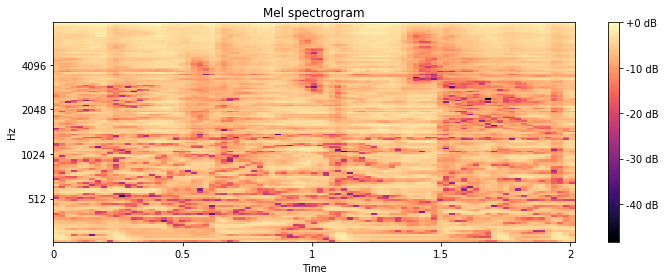

In [113]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [116]:
print(S.shape)
S = np.atleast_2d(S)
print(S.shape)

(128, 87)
(128, 87)


In [127]:
# Compute the reference spectrogram.
# Efficiency hack: skip filtering step and pass by reference
# if max_size will produce a no-op.

max_size = 1
if max_size == 1:
    ref_spec = S
else:
    ref_spec = scipy.ndimage.maximum_filter1d(S, max_size, axis=0)
    

In [267]:
#librosa algirhtm
lag = 1
# Compute difference to the reference, spaced by lag
onset_env = S[:, lag:] - ref_spec[:, :-lag]
# Discard negatives (decreasing amplitude)
onset_env = np.maximum(0.0, onset_env)
print(onset_env)

[[ 0.41464607  0.65151407  0.         ...,  6.38611583  5.88124237  0.        ]
 [ 2.46034974  0.          0.         ...,  5.55397368  0.          0.        ]
 [ 0.97246721  0.          0.         ...,  3.56605893  0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.30975544 ...,  0.          0.          0.        ]]


In [266]:
# reger chang algorithm
lag = 1
# Compute difference to the reference, spaced by lag
onset_env_roger = np.abs(S[:, lag:]) - np.abs(ref_spec[:, :-lag])
onset_env_roger = (onset_env_roger + np.abs(onset_env_roger))/2
# Discard negatives (decreasing amplitude)
onset_env_roger = np.maximum(0.0, onset_env_roger)
print(onset_env_roger)

[[ 0.41464607  0.65151407  0.         ...,  6.38611583  5.88124237  0.        ]
 [ 2.46034974  0.          0.         ...,  5.55397368  0.          0.        ]
 [ 0.97246721  0.          0.         ...,  3.56605893  0.          0.        ]
 ..., 
 [ 0.48767826  0.42311163  0.98581976 ...,  0.60772496  2.11678073
   3.77632477]
 [ 0.4546316   1.95201104  0.57053659 ...,  2.3467949   2.63425708
   2.95407123]
 [ 0.54516832  2.18485686  0.         ...,  0.92707288  3.77264081
   0.25767348]]


In [271]:
#librosa_col_1 = pd.DataFrame(onset_env[:,0])
#roger_col_1   = pd.DataFrame(onset_env_roger[:,0])
algorithm_comp = pd.DataFrame([onset_env[:,0],onset_env_roger[:,0]])
display(algorithm_comp)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.414646,2.46035,0.972467,0.0,0.0,0.0,0.0,1.546234,0.0,0.0,...,0.130849,0.00000,0.887511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.414646,2.46035,0.972467,0.0,0.0,0.0,0.0,1.546234,0.0,0.0,...,0.000000,0.08938,0.000000,1.437432,0.193758,0.117682,0.571088,0.487678,0.454632,0.545168


# how 'diff' workable (example)

In [152]:
z = np.round(frameset[0:4,0:4],2)
print(z)
refz = z
diffz = z[:, lag:] - refz[:, :-lag]
diffz = np.round(diffz,2)
print('\n')
print(diffz)
print('\n')
diffz0 = np.maximum(0,diffz)
print(diffz0)

[[ 0.03  0.17  0.23  0.01]
 [ 0.    0.16  0.23  0.07]
 [ 0.04  0.13  0.16  0.05]
 [ 0.07  0.13  0.1  -0.08]]


[[ 0.14        0.06       -0.22      ]
 [ 0.16        0.07       -0.16      ]
 [ 0.09        0.03       -0.11      ]
 [ 0.06       -0.03       -0.18000001]]


[[ 0.14  0.06  0.  ]
 [ 0.16  0.07  0.  ]
 [ 0.09  0.03  0.  ]
 [ 0.06  0.    0.  ]]


# get frame means/median

In [154]:
# Aggregate within channels
channels=None
pad = True
if channels is None:
    channels = [slice(None)]
else:
    pad = False

In [304]:
# aggregation function (default: np.mean)
# np.mean (default)
# np.median
aggregate = np.mean
#aggregate = np.median

onset_env_agg = librosa.util.sync(onset_env, channels, aggregate=aggregate,pad=pad,axis=0)
print('onset_env shape is ' + str(onset_env.shape))
print('onset_env.agg shape is ' + str(onset_env_agg.shape))
print(onset_env_agg)


onset_env shape is (128, 86)
onset_env.agg shape is (1, 86)
[[ 1.65065322  1.04748482  0.92908384  1.15473306  0.61257122  0.71005725
   0.60665923  0.91021072  3.71131416  2.49001294  0.67750846  0.62133719
   0.67319337  0.72031778  0.61504393  0.6378617   0.60536783  0.69290488
   1.04737693  1.56360722  1.9004554   1.674025    1.71638978  0.73220227
   0.49552201  1.51138643  3.89353024  2.6132157   0.67735411  0.65178922
   0.65371325  0.77126829  0.54142137  0.44846466  0.37622935  0.68297577
   2.04074985  1.17323312  0.61944867  1.06499446  1.70730077  1.49277804
   1.39829735  1.39955367  1.50836265  2.8298811   2.8753272   0.24217862
   0.57895866  0.99863075  0.645805    0.65340699  0.6815422   0.71346061
   0.85122086  1.3890797   1.2133229   2.03112548  1.9324482   1.2725576
   0.97722249  0.51581469  1.66342616  4.56347964  2.55520584  0.91777653
   0.60938396  1.37039654  0.81940299  0.44842345  0.59329611  0.59596708
   1.90279944  1.78936216  1.15783583  1.06091374  0.

## what's differenc between np.mean and np.median

In [305]:
# aggregate = np.mean
print('np.mean   = ' + str(sum(onset_env[:,0])/128))

# aggregate = np.median
sorted_onset = np.sort(onset_env[:,0])
median_idx = int(len(sorted_onset)/2)
ma = sorted_onset[median_idx]
mb = sorted_onset[median_idx-1]
print('np.median = ' + str((ma+mb)/2))
print('\n')
#print(sorted_onset)

np.mean   = 1.65065322211
np.median = 0.136721714306




# padding fft/2*hop

In [306]:
#n_fft = kwargs.get('n_fft', 2048)
#hop_length = kwargs.get('hop_length', 512)

n_fft = 2048
hop_length = 512
#n_fft = 512
#hop_length =256

center = True
# compensate for lag
pad_width = lag
if center:
    # Counter-act framing effects. Shift the onsets by n_fft / hop_length
    pad_width += n_fft // (2 * hop_length)

onset_env_pad = np.pad(onset_env_agg, ([0, 0], [int(pad_width), 0]), mode='constant')



In [307]:
print(onset_env_agg.shape)
print(onset_env_pad.shape)
display(pd.DataFrame(np.vstack((onset_env_agg[0][0:10],onset_env_pad[0][0:10]))))
#onset_env_pad[0][1:10]

(1, 86)
(1, 89)


,0,1,2,3,4,5,6,7,8,9
0,1.650653,1.047485,0.929084,1.154733,0.612571,0.710057,0.606659,0.910211,3.711314,2.490013
1,0.000000,0.000000,0.000000,1.650653,1.047485,0.929084,1.154733,0.612571,0.710057,0.606659


## how to use kwargs

In [308]:
def func(a,b,c,**kwargs):
    print(a,b,c)
    d = kwargs.get('x',200)
    print(d)

args = {'a': 1, 'b': 2, 'c':3}
func(**args)

1 2 3
200


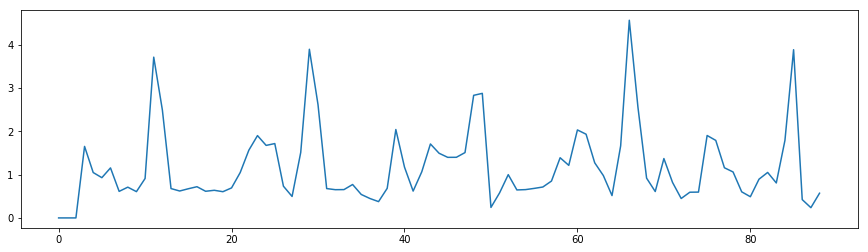

In [309]:
fig,ax = plt.subplots(1,1,figsize=(15,4))
plt.plot(onset_env_pad[0])
#onset_env_pad[0]

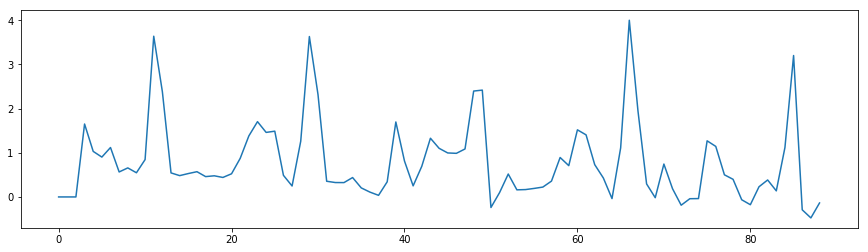

In [310]:
import scipy
# remove the DC component
#if detrend:
onset_env_lpass = scipy.signal.lfilter([1.0, -1.0], [1.0, -0.99], onset_env_pad, axis=-1)
fig,ax = plt.subplots(1,1,figsize=(15,4))
plt.plot(onset_env_lpass[0])

In [311]:
display(pd.DataFrame(np.vstack((onset_env_pad[0],onset_env_lpass[0]))))

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,0.0,0.0,0.0,1.650653,1.047485,0.929084,1.154733,0.612571,0.710057,0.606659,...,0.602045,0.489344,0.893829,1.049919,0.807250,1.790385,3.883291,0.422359,0.236460,0.570264
1,0.0,0.0,0.0,1.650653,1.030978,0.902268,1.118894,0.565543,0.657374,0.547402,...,-0.063750,-0.175814,0.230430,0.384215,0.137705,1.119462,3.201174,-0.291770,-0.474751,-0.136200


In [312]:
# Trim to match the input duration
if center:
    onset_env_final = onset_env_lpass[:, :S.shape[1]]
#fig,ax = plt.subplots(1,1,figsize=(15,4))
#plt.plot(onset_env_final)    

In [313]:
S.shape[1]

87

# comparison between librosa and ai-labs

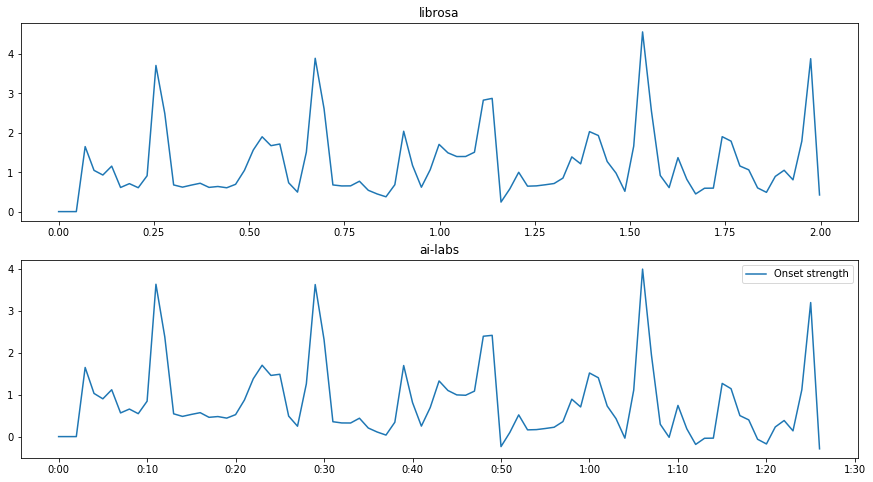

In [314]:
plt.figure(figsize=(15,8))
plt.subplot(2, 1, 1)
#librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.plot(times, o_env, label='Onset strength')
plt.title('librosa')
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(onset_env_final[0], label='Onset strength')
#plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
plt.title('ai-labs')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

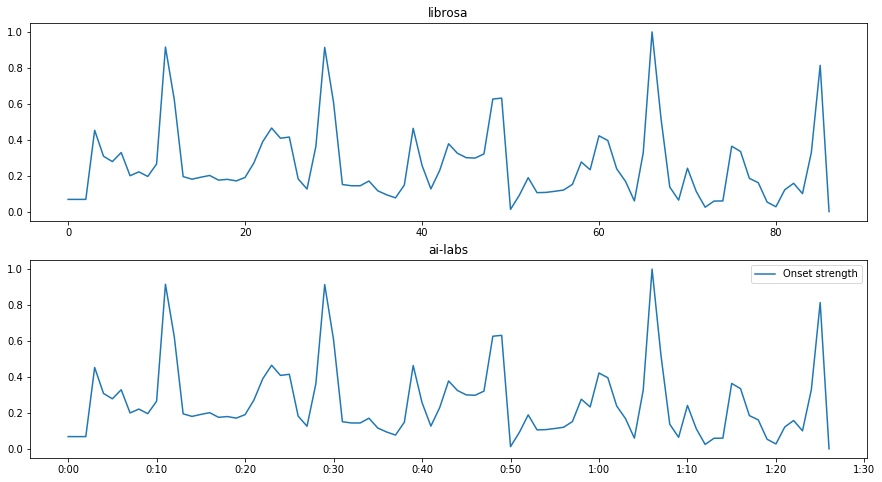

In [316]:
onset_envelope_f = onset_env_final[0]
# Shift onset envelope up to be non-negative
# (a common normalization step to make the threshold more consistent)
onset_envelope_f -= onset_envelope_f.min()

# Do we have any onsets to grab?
#if not onset_envelope_f.any():
#    return np.array([], dtype=np.int)
onset_envelope_f /= onset_envelope_f.max()


plt.figure(figsize=(15,8))
plt.subplot(2, 1, 1)
plt.plot(onset_env_final[0], label='Onset strength')
plt.title('librosa')

plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(onset_envelope_f, label='Onset strength')
#plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
plt.title('ai-labs')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

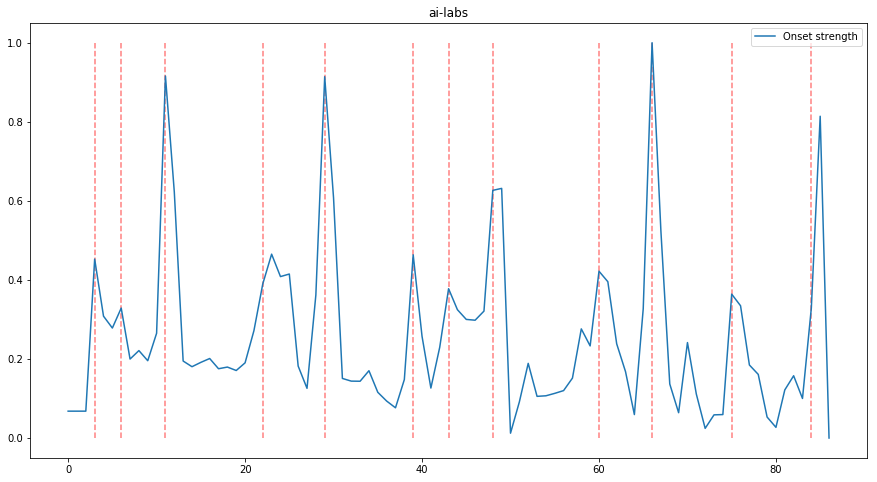

In [326]:
plt.figure(figsize=(15,8))
plt.subplot(1, 1, 1 )
plt.plot(onset_envelope_f, label='Onset strength')
#plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
plt.title('ai-labs')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)
# These parameter settings found by large-scale search
kwargs = {}
kwargs.setdefault('pre_max', 0.03*sr//hop_length)       # 30ms
kwargs.setdefault('post_max', 0.00*sr//hop_length + 1)  # 0ms
kwargs.setdefault('pre_avg', 0.10*sr//hop_length)       # 100ms
kwargs.setdefault('post_avg', 0.10*sr//hop_length + 1)  # 100ms
kwargs.setdefault('wait', 0.03*sr//hop_length)          # 30ms
kwargs.setdefault('delta', 0.07)

onset_line = librosa.util.peak_pick(onset_envelope_f,**kwargs)
plt.vlines(onset_line, 0, 1, alpha=0.5, color='r',linestyle='--', label='Beats')


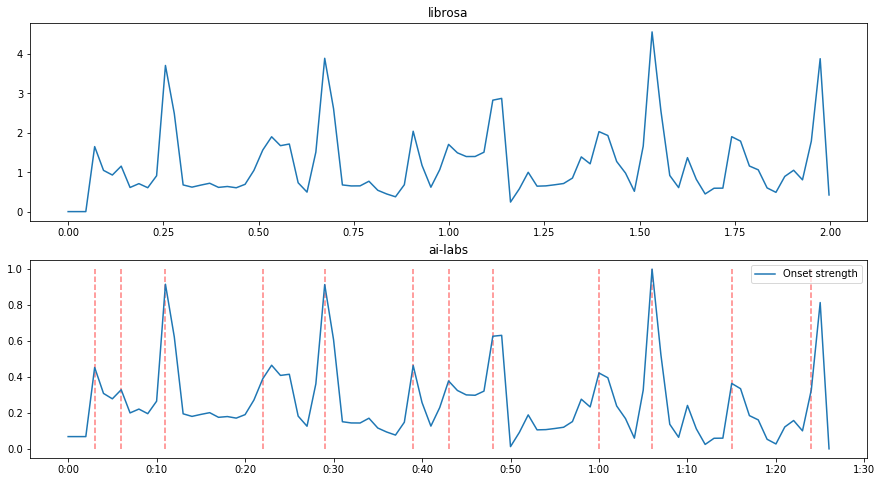

In [327]:
plt.figure(figsize=(15,8))
plt.subplot(2, 1, 1)
#librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.plot(times, o_env, label='Onset strength')
plt.title('librosa')
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(onset_env_final[0], label='Onset strength')
#plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
plt.title('ai-labs')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)
plt.vlines(onset_line, 0, 1, alpha=0.5, color='r',linestyle='--', label='Beats')